# **Классификация видов риса**

Датасет состоит из 18185 строк, каждая строка содержит данные о отдельном зерне риса. Представлен рис двух видов: Jasmine (Class = 1) и Gonen (Class = 0).

Даны такие параметры зерен как:

* Площадь (Area)
* Длина главной оси (MajorAxisLength)
* Длина побочной оси (MinorAxisLength)
* Эксцентриситет (Eccentricity)
* Выпуклая площадь (ConvexArea)
* Эквивалентный диаметр (EquivDiameter)
* Экстент (Площадь проекции) (Extent)
* Периметр (Perimeter)
* Округлость (Roundness)
* Соотношение сторон (AspectRation)

Это набор данных  содержит классификацию риса. 
Необходимо предсказать, к какому из двух классов риса принадлежит рис:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns           
import sklearn
import plotly.express          as ex
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
filename = '/kaggle/input/rice-type-classification/riceClassification.csv'

# Загрузка датасета
data = pd.read_csv(filename)
classes = ['Gonen', 'Jasmine']

In [3]:
# Размеры таблицы
data.shape

(18185, 12)

Посмотрим первые строки таблицы

In [4]:
data.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


Из приведенных выше выходных данных ясно, что в наборе данных нет категориальных столбцов.

In [6]:
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] ]

# **Визуализация данных**

Получаем сводную информацию о признаках: 

In [7]:
data.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [8]:
d = data.copy()
d["Class"] =  d["Class"].map({1:'Class : 1',0:'Class : 0'})
ex.pie(d,names='Class',title='Rice Classes')

Как видно, классы более менее сбалансированны.

Теперь построим матрицу корреляции 

In [9]:
corr_mat = data.corr()
corr_mat

id      Area  MajorAxisLength  MinorAxisLength  \
id               1.000000  0.709155         0.464022         0.637148   
Area             0.709155  1.000000         0.599939         0.930215   
MajorAxisLength  0.464022  0.599939         1.000000         0.273211   
MinorAxisLength  0.637148  0.930215         0.273211         1.000000   
Eccentricity    -0.347816 -0.550073         0.295717        -0.808640   
ConvexArea       0.707600  0.999362         0.602061         0.928992   
EquivDiameter    0.706333  0.998158         0.618002         0.923790   
Extent           0.149924  0.230541        -0.073549         0.308541   
Perimeter        0.628830  0.881540         0.870178         0.674249   
Roundness        0.430033  0.620490        -0.202566         0.834398   
AspectRation    -0.382648 -0.623979         0.240471        -0.860516   
Class           -0.808591 -0.816589        -0.147741        -0.917766   

                 Eccentricity  ConvexArea  EquivDiameter    Extent  Perimeter  \
id                  -0.347816    0.707600       0.706333  0.149924   0.628830   
Area                -0.550073    0.999362       0.998158  0.230541   0.881540   
MajorAxisLength      0.295717    0.602061       0.618002 -0.073549   0.870178   
MinorAxisLength     -0.808640    0.928992       0.923790  0.308541   0.674249   
Eccentricity         1.000000   -0.547896      -0.534688 -0.329954  -0.165915   
ConvexArea          -0.547896    1.000000       0.997403  0.227359   0.886987   
EquivDiameter       -0.534688    0.997403       1.000000  0.225944   0.891567   
Extent              -0.329954    0.227359       0.225944  1.000000   0.073227   
Perimeter           -0.165915    0.886987       0.891567  0.073227   1.000000   
Roundness           -0.903657    0.610236       0.607432  0.366793   0.186063   
AspectRation         0.950301   -0.621472      -0.609957 -0.350875  -0.227256   
Class                0.788636   -0.814214      -0.809361 -0.303440  -0.533274   

                 Roundness  AspectRation     Class  
id                0.430033     -0.382648 -0.808591  
Area              0.620490     -0.623979 -0.816589  
MajorAxisLength  -0.202566      0.240471 -0.147741  
MinorAxisLength   0.834398     -0.860516 -0.917766  
Eccentricity     -0.903657      0.950301  0.788636  
ConvexArea        0.610236     -0.621472 -0.814214  
EquivDiameter     0.607432     -0.609957 -0.809361  
Extent            0.366793     -0.350875 -0.303440  
Perimeter         0.186063     -0.227256 -0.533274  
Roundness         1.000000     -0.947875 -0.831759  
AspectRation     -0.947875      1.000000  0.832563  
Class            -0.831759      0.832563  1.000000

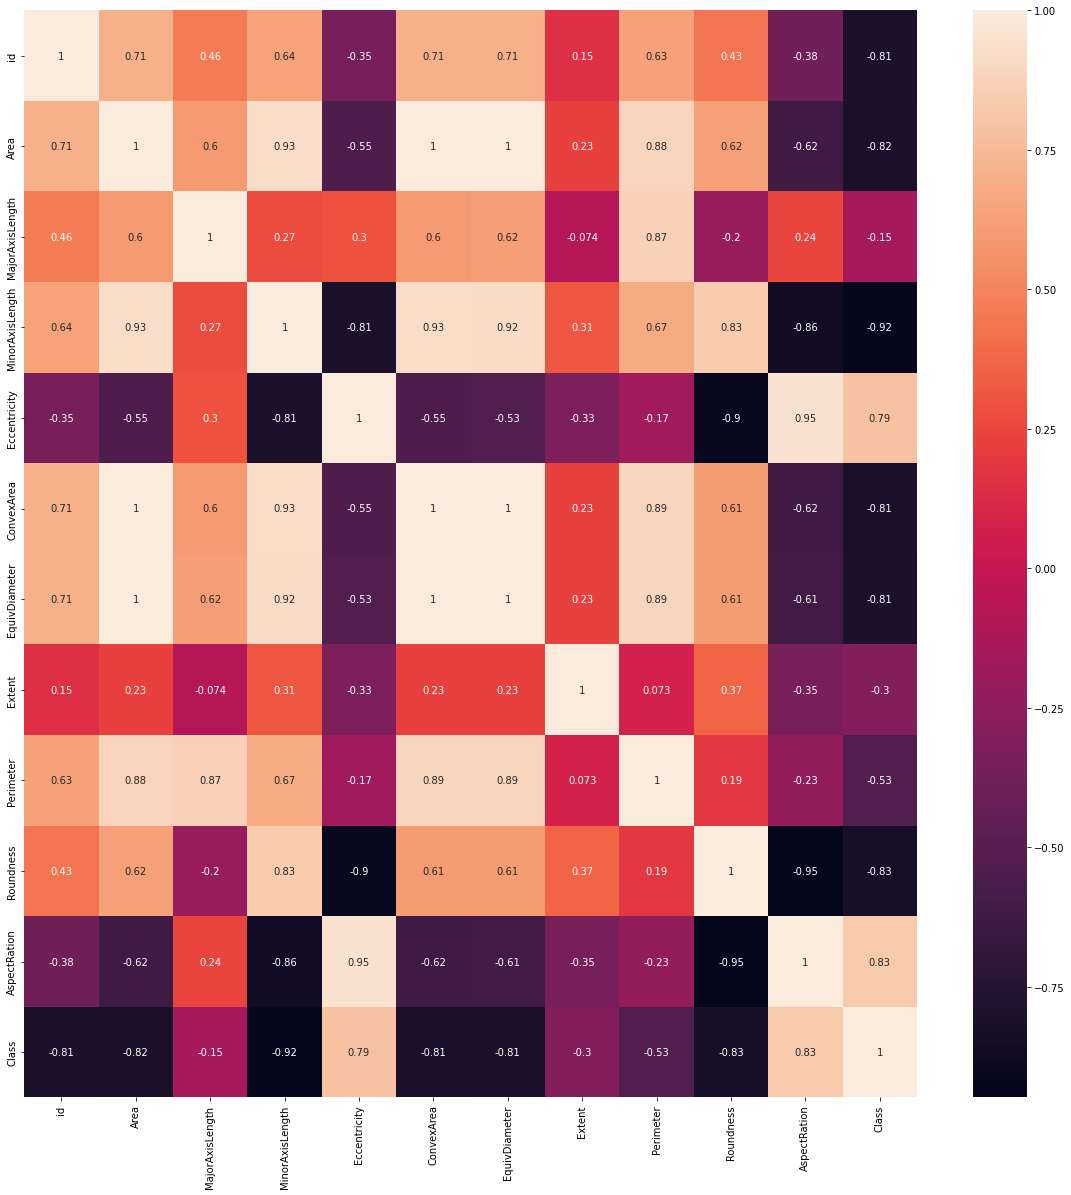

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data=pd.get_dummies(data).corr(), annot=True);

Мы видим, что MinorAxisLength,AspectRation,Roundness,Area,ConvexArea,EquivDiameter и Eccentricity имеют очень высокую корреляцию с целевой переменной.

Построим диаграммы рассеивания для данных признаков:

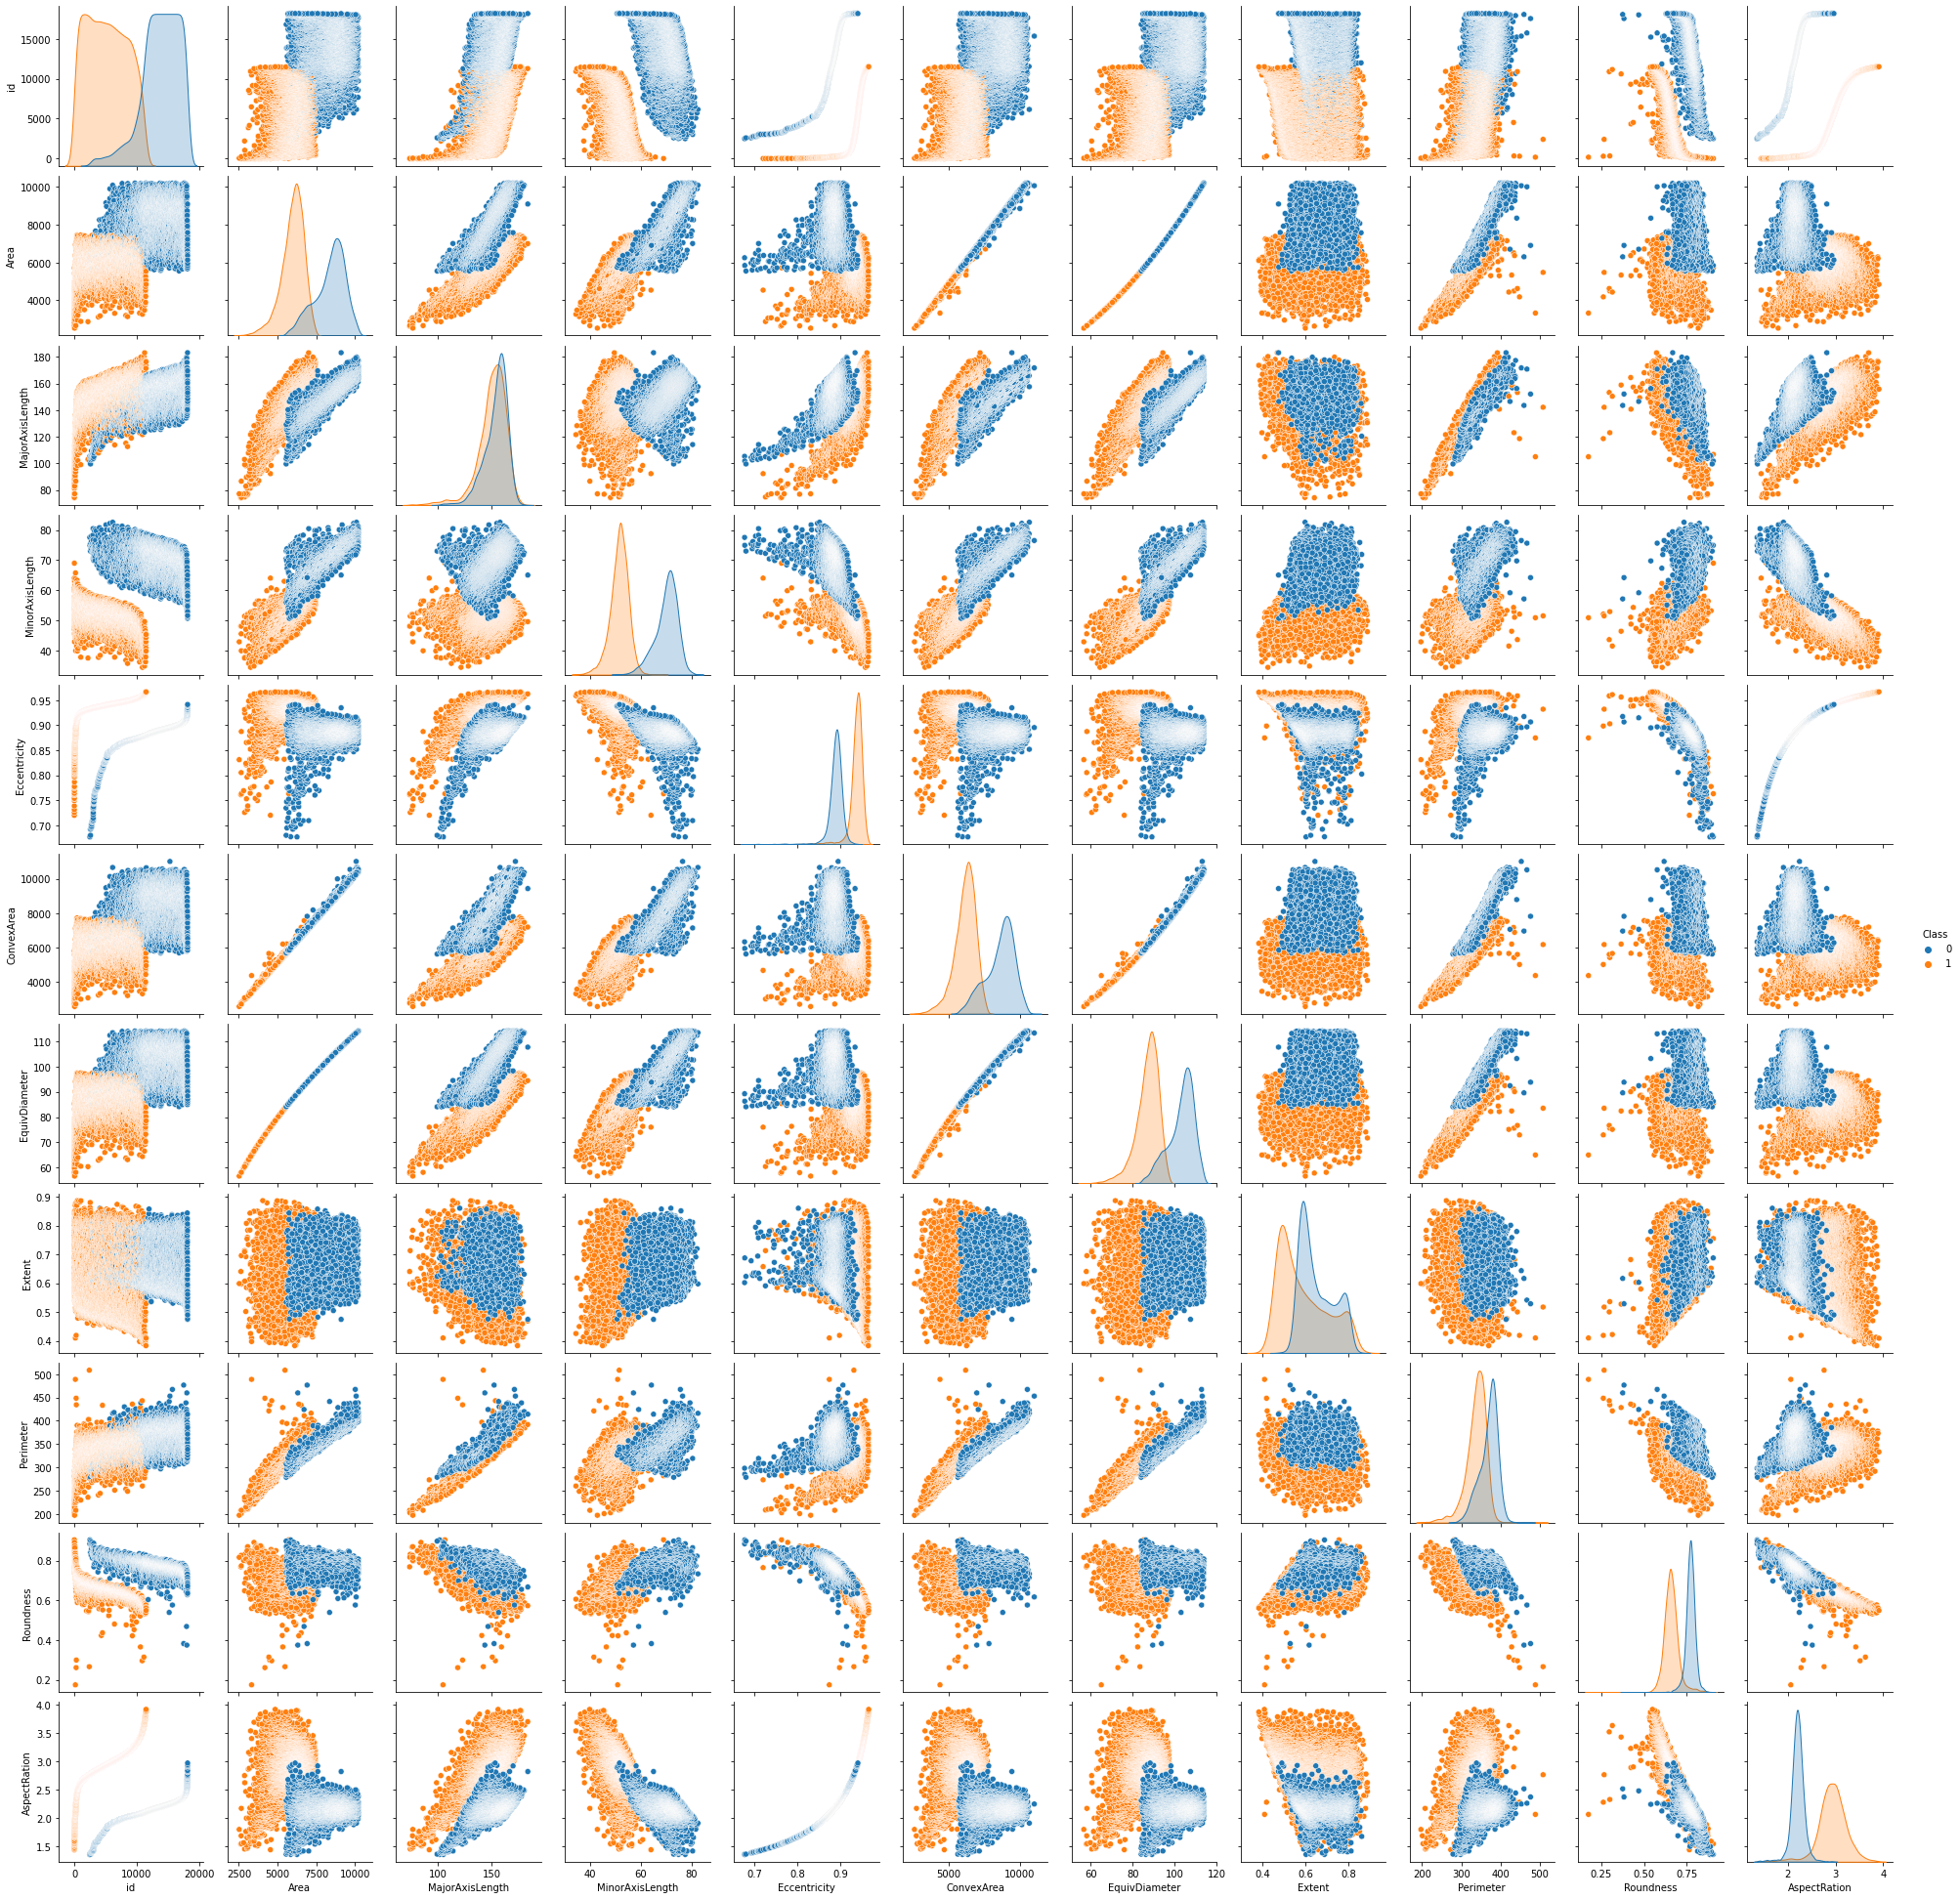

In [11]:
sns.pairplot(data=data, hue='Class');
pass

По графикам можно заметить что почти для каждого из измерений тренды для классов различаются. Это значит, что даже по нескольким измерениям можно достаточно надёжно предсказать класс. Также можно заметить однозначную зависимость эксцентриситета и соотношения сторон - эти величины зависимы или зависят от одного и того же набора других величин.

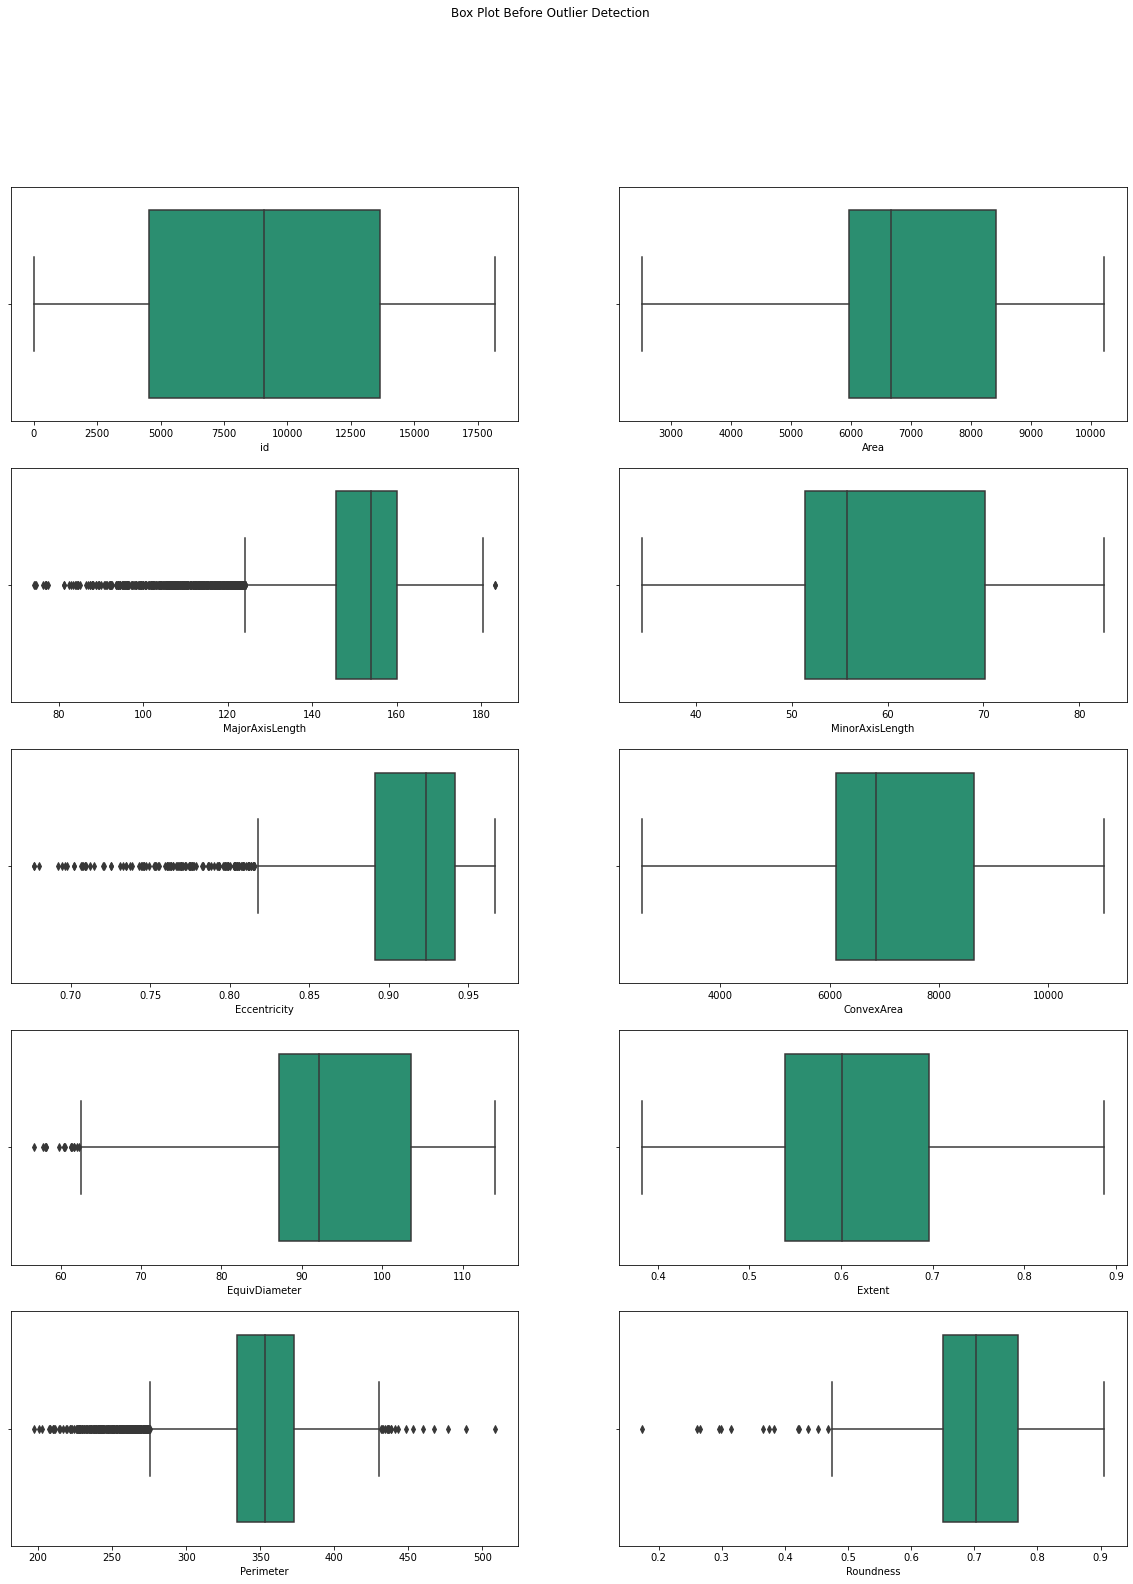

In [12]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=data, x=data.columns[k], palette='Dark2')
        k=k+1

Из графиков выше мы видим, что в пяти параметрах у нас бльшое количество выбросов.

In [13]:
# Вычисляем IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower
    
# Убираем выбросы
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

# Сбрасываем индекс фрейма данных
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=['index'],inplace=True)
    return main_df

In [14]:
main_data = data

for i in range(0,len(main_data.columns)-1):
    print('For ',data.columns[i])
    upper, lower = iqr_calculation(main_data,data[data.columns[i]])
    main_data = remove_outliers(main_data,upper,lower)
    final_data = reset_dataframe(main_data)

For  id
New Shape:  (18185, 12)
For  Area
New Shape:  (18185, 12)
For  MajorAxisLength
New Shape:  (17647, 12)
For  MinorAxisLength
New Shape:  (17647, 12)
For  Eccentricity
New Shape:  (17631, 12)
For  ConvexArea
New Shape:  (17631, 12)
For  EquivDiameter
New Shape:  (17631, 12)
For  Extent
New Shape:  (17631, 12)
For  Perimeter
New Shape:  (17602, 12)
For  Roundness
New Shape:  (17597, 12)
For  AspectRation
New Shape:  (17597, 12)


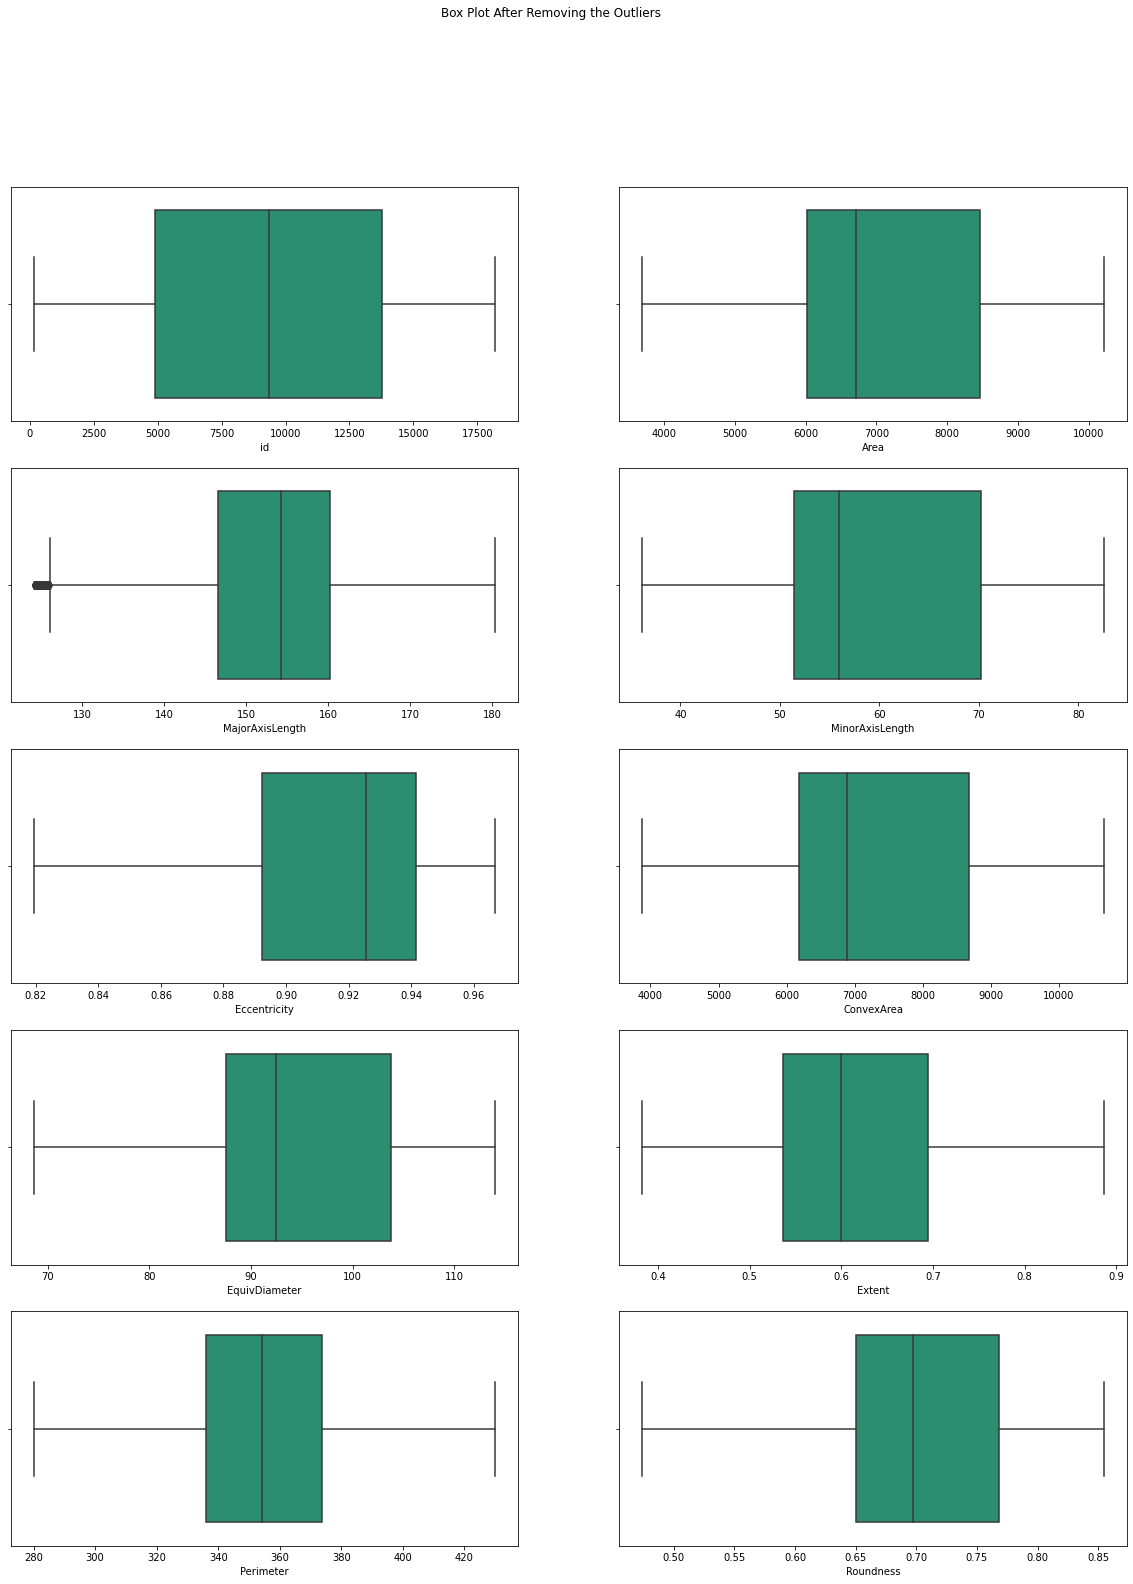

In [15]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,5):
    for j in range(0,2):
        col_name = final_data.columns[k]
        sns.boxplot(ax=axes[i,j], data=final_data,x=col_name,palette='Dark2')
        k=k+1

# **Пропущенные значения**

In [16]:
data.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [17]:
data_num = data[num_cols]
data_num.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  17597.000000  17597.000000     17597.000000     17597.000000   
mean    9325.473206   7111.463772       152.978496        59.961723   
std     5141.303267   1412.424549         9.926544        10.004501   
min      159.000000   3698.000000       124.110890        36.177914   
25%     4917.000000   6018.000000       146.610657        51.456124   
50%     9357.000000   6709.000000       154.289429        55.917314   
75%    13774.000000   8464.000000       160.280519        70.225361   
max    18185.000000  10210.000000       180.332508        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  17597.000000  17597.000000   17597.000000  17597.000000  17597.000000   
mean       0.917226   7301.974086      94.689501      0.615732    353.964315   
std        0.027213   1445.997988       9.407461      0.104490     25.733769   
min        0.819338   3883.000000      68.618072      0.383239    280.060000   
25%        0.892386   6180.000000      87.534882      0.536760    335.976000   
50%        0.925461   6892.000000      92.423829      0.600259    354.276000   
75%        0.941634   8687.000000     103.810883      0.694617    373.589000   
max        0.966774  10659.000000     114.016559      0.886137    429.919000   

          Roundness  AspectRation         Class  
count  17597.000000  17597.000000  17597.000000  
mean       0.706197      2.615482      0.542252  
std        0.065566      0.424586      0.498226  
min        0.474142      1.744254      0.000000  
25%        0.650238      2.215959      0.000000  
50%        0.697445      2.639618      1.000000  
75%        0.768167      2.970556      1.000000  
max        0.854461      3.911845      1.000000

Выполним стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех количественных признаков:

In [18]:
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_num.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  1.759700e+04  1.759700e+04     1.759700e+04     1.759700e+04   
mean   1.651738e-16 -1.540394e-15     1.144781e-14    -3.505615e-14   
std    1.000000e+00  1.000000e+00     1.000000e+00     1.000000e+00   
min   -1.782908e+00 -2.416741e+00    -2.908123e+00    -2.377311e+00   
25%   -8.574622e-01 -7.741750e-01    -6.414961e-01    -8.501771e-01   
50%    6.132063e-03 -2.849453e-01     1.320633e-01    -4.042588e-01   
75%    8.652528e-01  9.575989e-01     7.356057e-01     1.025902e+00   
max    1.723206e+00  2.193771e+00     2.755643e+00     2.257888e+00   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  1.759700e+04  1.759700e+04   1.759700e+04  1.759700e+04  1.759700e+04   
mean   2.561857e-13  3.696411e-16   1.372609e-13  4.685802e-14  2.674487e-14   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.597053e+00 -2.364439e+00  -2.771357e+00 -2.225034e+00 -2.871881e+00   
25%   -9.127704e-01 -7.759168e-01  -7.605260e-01 -7.557919e-01 -6.990159e-01   
50%    3.026068e-01 -2.835233e-01  -2.408378e-01 -1.480798e-01  1.211190e-02   
75%    8.969201e-01  9.578339e-01   9.695902e-01  7.549561e-01  7.626044e-01   
max    1.820702e+00  2.321598e+00   2.054439e+00  2.587865e+00  2.951557e+00   

          Roundness  AspectRation         Class  
count  1.759700e+04  1.759700e+04  1.759700e+04  
mean   1.152632e-14 -6.448075e-14 -9.755040e-14  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.539230e+00 -2.051948e+00 -1.088365e+00  
25%   -8.534663e-01 -9.409727e-01 -1.088365e+00  
50%   -1.334762e-01  5.684499e-02  9.187571e-01  
75%    9.451526e-01  8.362824e-01  9.187571e-01  
max    2.261289e+00  3.053241e+00  9.187571e-01

# **Разделение данных на обучающую и тестовую выборки**

In [19]:
X = data
y = data['Class']
N, d = X.shape
N, d

(17597, 12)

In [20]:
X.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [21]:
y

0        1
1        1
2        1
3        1
4        1
        ..
17592    0
17593    0
17594    0
17595    0
17596    0
Name: Class, Length: 17597, dtype: int64

Разобьем данные на обучающую и тестовую выборки

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 85)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3519 14078


# **Классификатор ближайших соседей $k$NN**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 20)}, cv = 5)
knn.fit(X_train, y_train)

err_test = 1 - knn.best_score_

In [24]:
err_test

0.016765404758825708

In [25]:
knn.predict(X_test)[0:5]

array([1, 1, 1, 1, 1])

In [26]:
# Точность модели
knn.score(X_test, y_test)

0.9825259269782639

In [27]:
knn.best_params_

{'n_neighbors': 16}

 Оптимальным значением для n_neighbors является 11

In [28]:
# Ошибки на обучающей выборке
np.mean(y_train != knn.predict(X_train))

0.015913611821540212

In [29]:
# Ошибки на тестовой выборке
np.mean(y_test  != knn.predict(X_test))

0.017474073021736043

In [30]:
#SVC
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.0 0.46086091774399773


In [31]:
#GBT
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0)

# **Обучение нейронной сети**

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Нейронная сеть с одним скрытым слоем:

In [33]:
mlp_model = MLPClassifier(hidden_layer_sizes = (101,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 404)

In [34]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(101,), max_iter=2000,
              random_state=404, solver='lbfgs')

In [35]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

**Ошибки на обучающей и тестовой выборках при одном скрытом слое:**

In [36]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.00042619690296917176


Нейронная сеть с двумя скрытыми слоями:

In [37]:
mlp_model = MLPClassifier(hidden_layer_sizes = (101,101,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 404)

In [38]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(101, 101),
              max_iter=2000, random_state=404, solver='lbfgs')

In [39]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

**Ошибки на обучающей и тестовой выборках при двух срытых слоях:**

In [40]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0002841716396703609 0.0014916891603921011


**Подберем оптимальный гипер-параметр alpha**

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = (50,), 
                              solver = 'sgd', 
                              activation = 'logistic', 
                              max_iter= 5000, 
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

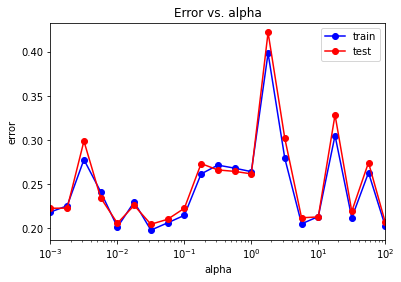

In [43]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

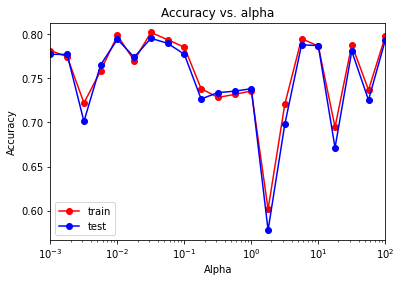

In [44]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.19806763285024154
Минимальная ошибка на тестовой выборке:  0.2047165790595255


In [46]:
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Оптимальное значение alpha: ', alpha_local_opt)

Оптимальное значение alpha:  0.03162277660168379


**Попробуем подобрать оптимальное количество нейронов для одного скрытого слоя**

In [47]:
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = size,
                              solver = 'sgd', 
                              max_iter = 5000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

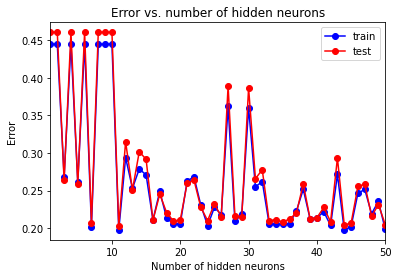

In [48]:
plt.plot(hidden_layer, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

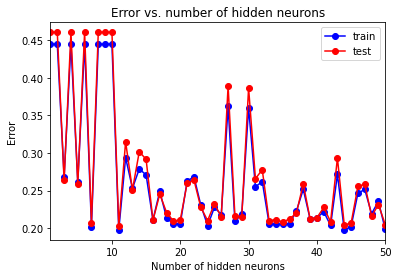

In [49]:
plt.plot(hidden_layer, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

In [50]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.19749928957090082
Минимальная ошибка на тестовой выборке:  0.20308282426481034


In [51]:
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_local_opt_1)

Оптимальное значение количества нейронов скрытого слоя:  11


**Попробуем добавить еще один скрытой слой и подобрать для него оптимальное количество нейронов**

In [52]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs', 
                              max_iter = 5000, 
                              activation = 'logistic',
                              random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 6min 31s, sys: 5min 14s, total: 11min 45s
Wall time: 2min 59s


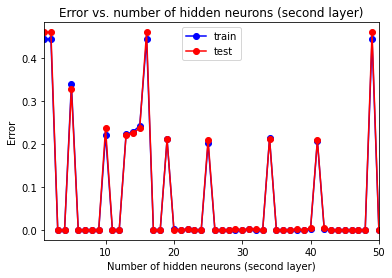

In [53]:
plt.plot(hidden_layer, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

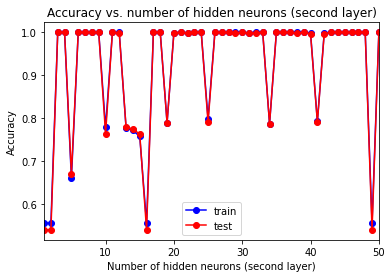

In [54]:
plt.plot(hidden_layer, train_acc, 'b-o', label = 'train')
plt.plot(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [55]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.0


In [56]:
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_local_opt_2)

Оптимальное значение количества нейронов второго скрытого слоя:  23


# Выводы
* наилучший результат был получен при alpha - 0.03 и оптимальное значение количества нейронов скрытого слоя - 11
*  По результатам оказалось что выборка более менее сбалансированная
* По результатам классификаторов с наименьшим количсетвом ошибок оказался - GBT